# Bike example - GLM

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df_raw = pd.read_csv('data/nyc_bb_bicyclist_counts.csv', header=0)

### Daily total of bike counts conducted on the Brooklyn Bridge from 01 April 2017 to 31 October 2017. Source: NYC Open Data: Bicycle Counts for East River Bridges

In [13]:
df = pd.read_csv(
    'data/nyc_bb_bicyclist_counts.csv',
    header=0, 
    parse_dates=[0], 
    index_col=[0],
    date_format="%d-%b-%y")

Separating the dates into month and days columns

In [14]:
ds = df.index.to_series()
df['MONTH'] = ds.dt.month
df['DAY_OF_WEEK'] = ds.dt.dayofweek
df['DAY'] = ds.dt.day

 ## Multiple regression

In [9]:
from sklearn.model_selection import train_test_split

df_copy = df.copy()

y = df_copy.pop("BB_COUNT")
X = df_copy

In [6]:
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42) 

In [132]:
# Define the dependent and independent variables

# Fit the multiple regression model
model_reg = sm.OLS(y_train, X_train)
result_reg = model_reg.fit()
print(result_reg.summary())

                            OLS Regression Results                            
Dep. Variable:               BB_COUNT   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     29.61
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           2.24e-23
Time:                        17:49:57   Log-Likelihood:                -1242.9
No. Observations:                 160   AIC:                             2500.
Df Residuals:                     153   BIC:                             2521.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         519.2315    358.887      1.447      

In [133]:
reg_predict = result_reg.predict(X_test)

In [134]:
reg_predict = result_reg.predict(X_test)
reg_df = pd.concat([y_test, y_predict], axis=1)
reg_df = reg_df.reset_index(drop=False)
reg_df = reg_df.rename(columns={"BB_COUNT": "actual bikes rented", 0: "predicted bikes rented"})

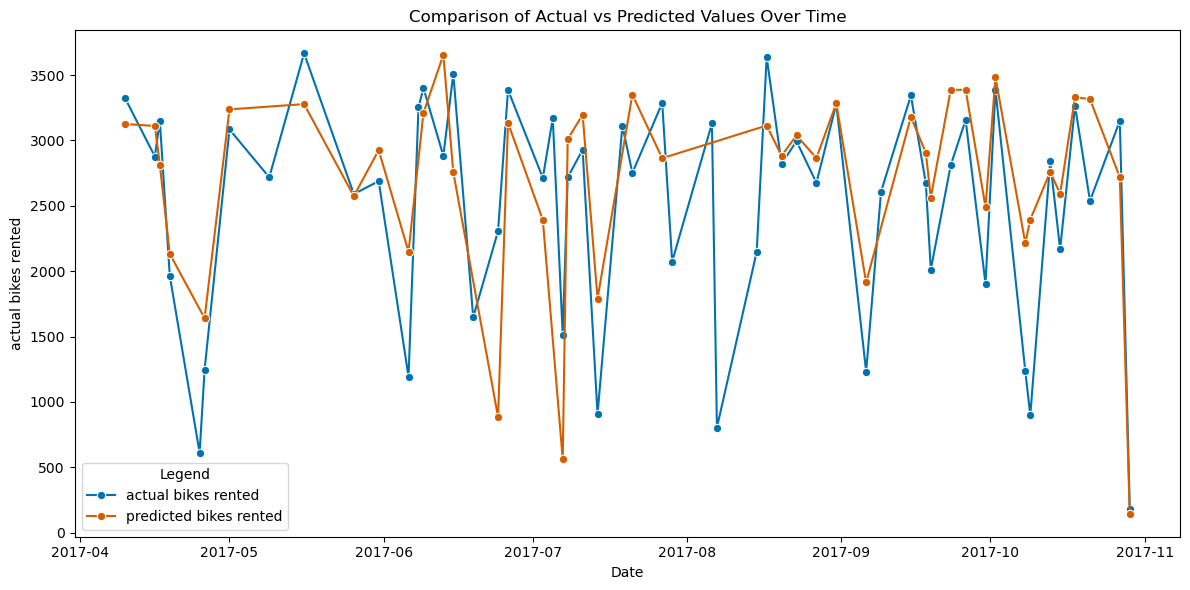

In [135]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=reg_df, x="Date", y="actual bikes rented", label="actual bikes rented", color="#0072B2", marker="o")
sns.lineplot(data=reg_df, x="Date", y="predicted bikes rented", label="predicted bikes rented", color="#D55E00", marker="o")

# Customize the plot
plt.title("Comparison of Actual vs Predicted Values Over Time")
plt.legend(title="Legend")
plt.tight_layout()

# Show the plot
plt.show()

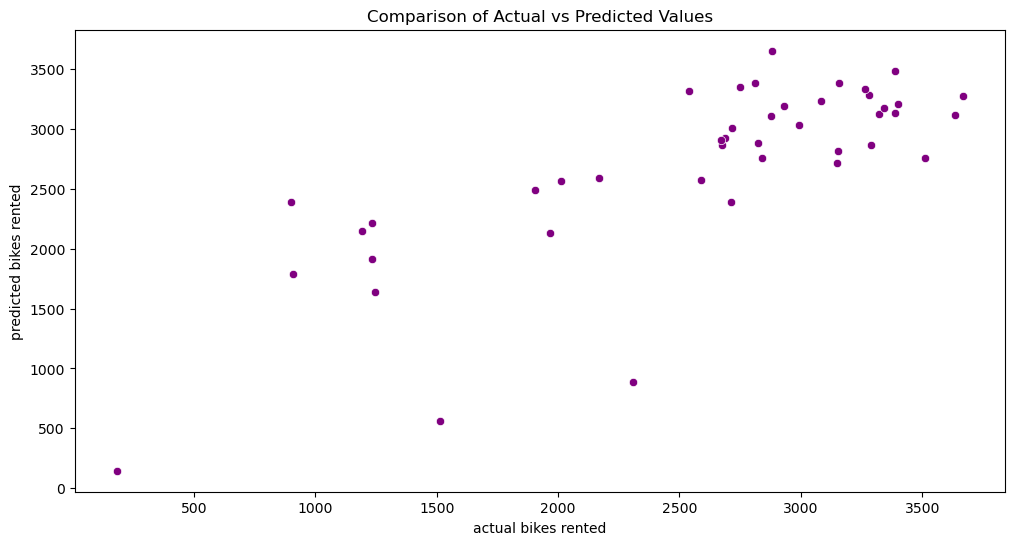

In [136]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=reg_df, x="actual bikes rented", y="predicted bikes rented", color="purple")
plt.title("Comparison of Actual vs Predicted Values")
plt.show();

## Modelling

In [110]:
from sklearn.model_selection import train_test_split

y = df.pop("BB_COUNT")
X = df

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42) # test_size=0.25 

In [116]:
# getting all the training data together
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [117]:
# formula
formula = """BB_COUNT ~ DAY  + DAY_OF_WEEK + MONTH + HIGH_T + LOW_T + PRECIP"""
family = sm.families.Poisson()
model = smf.glm(formula, train, family=family)
result = model.fit()

In [118]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               BB_COUNT   No. Observations:                  160
Model:                            GLM   Df Residuals:                      153
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11014.
Date:                Tue, 03 Dec 2024   Deviance:                       20481.
Time:                        16:31:34   Pearson chi2:                 2.06e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.1008      0.013    565.029      

In [119]:
print(result.aic)

22042.69869114201


In [142]:
residual_deviance = result.deviance
null_deviance = result.null_deviance
deviance_explained = 1 - (residual_deviance / null_deviance)
print(deviance_explained)

0.5869548662430194


In [120]:
y_predict = result.predict(X_test)

In [121]:
test_predict = pd.concat([y_test, y_predict], axis=1)
test_predict = test_predict.reset_index(drop=False)
test_predict = test_predict.rename(columns={"BB_COUNT": "actual bikes rented", 0: "predicted bikes rented"})

In [122]:
test_predict

,Date,actual bikes rented,predicted bikes rented
0,2017-04-10,3324,3100.935092
1,2017-10-15,2169,2618.918878
2,2017-06-06,1193,2161.036508
3,2017-10-09,898,2397.909268
4,2017-07-27,3287,2884.451667
5,2017-07-21,2751,3358.890036
6,2017-04-16,2877,3086.240028
7,2017-06-26,3386,3145.632165
8,2017-06-15,3510,2770.452713
9,2017-08-23,2994,3059.922167


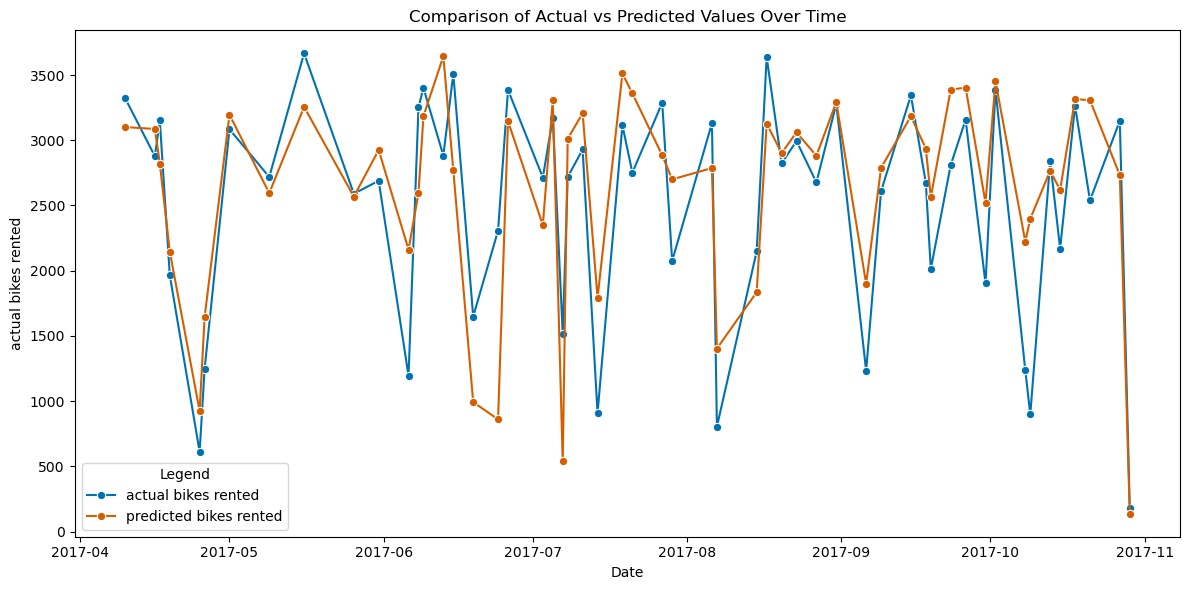

In [123]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=test_predict, x="Date", y="actual bikes rented", label="actual bikes rented", color="#0072B2", marker="o")
sns.lineplot(data=test_predict, x="Date", y="predicted bikes rented", label="predicted bikes rented", color="#D55E00", marker="o")

# Customize the plot
plt.title("Comparison of Actual vs Predicted Values Over Time")
plt.legend(title="Legend")
plt.tight_layout()

# Show the plot
plt.show()

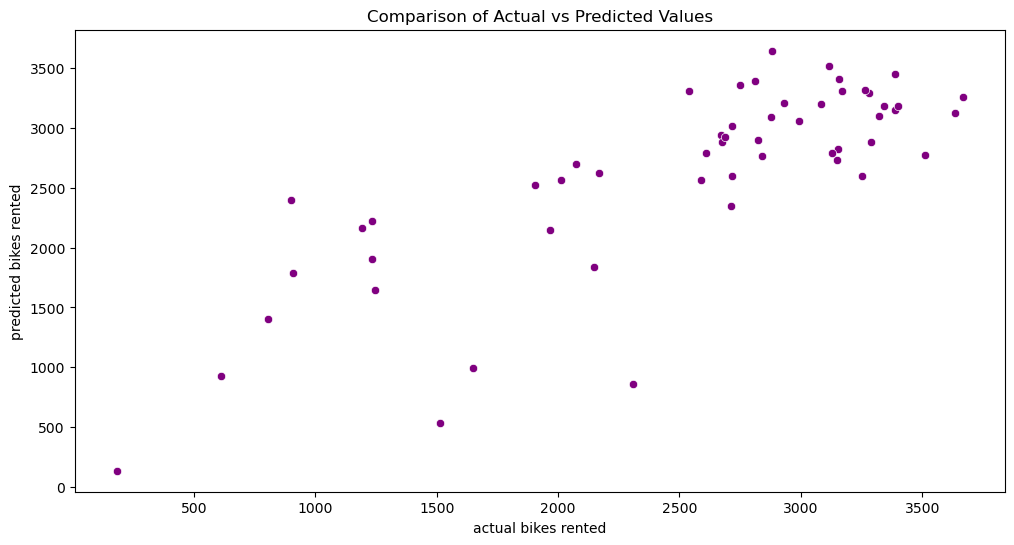

In [124]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=test_predict, x="actual bikes rented", y="predicted bikes rented", color="purple")
plt.title("Comparison of Actual vs Predicted Values")
plt.show();

### Comparison between regression and glm

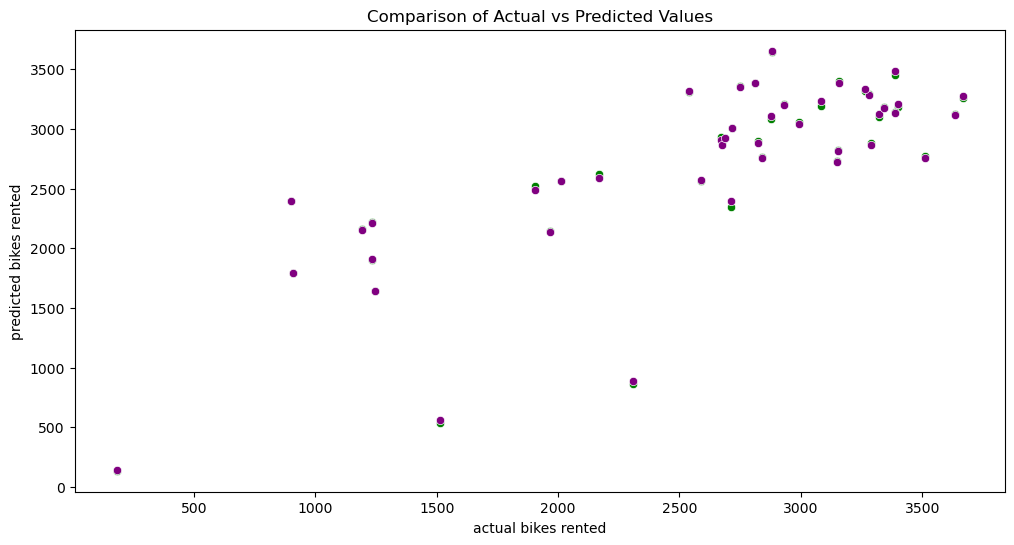

In [127]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=reg_df, x="actual bikes rented", y="predicted bikes rented", color="green")
sns.scatterplot(data=test_predict, x="actual bikes rented", y="predicted bikes rented", color="purple")
plt.title("Comparison of Actual vs Predicted Values")
plt.show();

## Bootstrapping and AIC

In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.utils import resample

# Define your data and model
data = df
formula = "BB_COUNT ~ DAY + DAY_OF_WEEK + MONTH + HIGH_T + LOW_T + PRECIP"
family = sm.families.Poisson()

# Number of bootstrap samples
iterations = 1000

aics = []

# Bootstrapping
for i in range(iterations):
    bootstrapping = data.sample(n=1000, replace=True)
    model = smf.glm(formula=formula, data=bootstrapping, family=family)
    result = model.fit()
    aic = result.aic
    aics.append(aic)
    #print(round(aic,3))

In [81]:
print(np.mean(aics), np.std(aics))

142287.33448462893 7306.094930100326


In [16]:
aics_as_floats = [float(value) for value in aics]

#print(aics_as_floats)

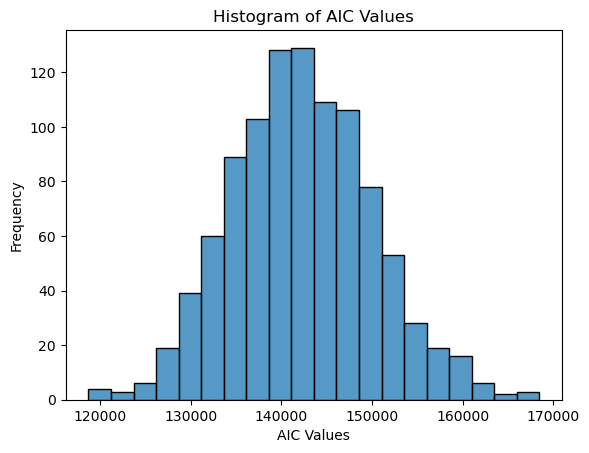

In [17]:
sns.histplot(aics_as_floats, kde=False, bins=20)
plt.xlabel("AIC Values")
plt.ylabel("Frequency")
plt.title("Histogram of AIC Values")
plt.show()

## k-fold cross validation

In [18]:
from sklearn.model_selection import KFold

data = df
formula = "BB_COUNT ~ DAY + DAY_OF_WEEK + MONTH + HIGH_T + LOW_T + PRECIP"
family = sm.families.Poisson()


# Set up k-fold cross-validation
kf = KFold(n_splits=50, shuffle=True, random_state=42)  # Adjust k as needed
aic_scores = []


# Perform k-fold cross-validation
for train_index, test_index in kf.split(data):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]
    
    # Fit the model on training data
    model = smf.glm(formula=formula, data=train_data, family=family)
    result = model.fit()
    # Store AIC score
    aic_scores.append(result.aic)

# Evaluate the results
mean_aic = np.mean(aic_scores)
std_aic = np.std(aic_scores)

print(f"Mean AIC: {mean_aic:.3f}")
print(f"Standard Deviation of AIC: {std_aic:.3f}")

Mean AIC: 30002.022
Standard Deviation of AIC: 524.941


In [25]:
aic_scores_floats = [float(value) for value in aic_scores]

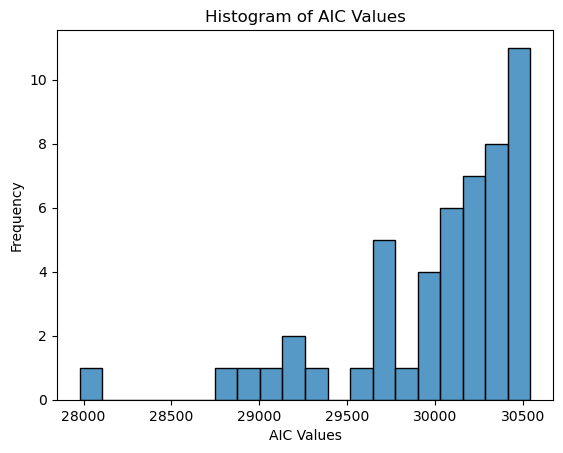

In [27]:
sns.histplot(aic_scores_floats, kde=False, bins=20)
plt.xlabel("AIC Values")
plt.ylabel("Frequency")
plt.title("Histogram of AIC Values")
plt.show()

## Leave-One-Out Cross-Validation (LOOCV)

In [91]:
from sklearn.model_selection import LeaveOneOut


data = df_copy 
formula = "BB_COUNT ~ DAY + DAY_OF_WEEK + MONTH + HIGH_T + LOW_T + PRECIP"
family = sm.families.Poisson()

# Set up Leave-One-Out Cross-Validation
loo = LeaveOneOut()
aic_scores = []

# Perform LOOCV
for train_index, test_index in loo.split(data):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]
    
    model = smf.glm(formula=formula, data=train_data, family=family)
    result = model.fit()
    # Store AIC score
    aic_scores.append(result.aic)

# Evaluate results
mean_aic = np.mean(aic_scores)
std_aic = np.std(aic_scores)

print(f"Mean AIC: {mean_aic:.3f}")
print(f"Standard Deviation of AIC: {std_aic:.3f}")

Mean AIC: 30492.679
Standard Deviation of AIC: 251.234


# Titanic example - GLM and Decssion tree

Dataset variables:

* survival --> Whether a passenger survived or not
* pclass --> Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* sex --> Sex
* Age --> Age in years
* sibsp --> # of siblings / spouses aboard the Titanic
* parch --> # of parents / children aboard the Titanic
* ticket --> Ticket number
* fare --> Passenger fare
* cabin --> Cabin number
* embarked --> Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [2]:
titanic_data = pd.read_csv("data/titanic.txt",sep=',')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## GLM - Model comparisons

In [3]:
model_used, model_aic, model_deviance = [], [], []

In [4]:
# null model
formula = 'Survived ~ 1'
model = smf.glm(formula, titanic_data, family = sm.families.Binomial()) # https://www.statsmodels.org/stable/glm.html#families
result = model.fit()
print(result.summary())
model_used.append(formula)
model_aic.append(result.aic)
model_deviance.append(result.deviance)
print("The result of the AIC is: ")
print(result.aic)
print(result.deviance)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      890
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -593.33
Date:                Thu, 05 Dec 2024   Deviance:                       1186.7
Time:                        10:20:52   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):              0.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4733      0.069     -6.870      0.0

In [5]:
#no interactions
formula = 'Survived ~ Pclass + Sex + Age'
model = smf.glm(formula, titanic_data, family = sm.families.Binomial())
result = model.fit()
print(result.summary())
model_used.append(formula)
model_aic.append(result.aic)
model_deviance.append(result.deviance)
print("The result of the AIC is: ")
print(result.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      710
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.65
Date:                Thu, 05 Dec 2024   Deviance:                       647.29
Time:                        10:21:04   Pearson chi2:                     768.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3587
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0560      0.502     10.069      

In [6]:
# all interactions of factors
formula = 'Survived ~ Pclass * Sex * Age'
model = smf.glm(formula, titanic_data, family = sm.families.Binomial())
result = model.fit()
print(result.summary())
model_used.append(formula)
model_aic.append(result.aic)
model_deviance.append(result.deviance)
print("The result of the AIC is: ")
print(result.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      706
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -310.43
Date:                Thu, 05 Dec 2024   Deviance:                       620.85
Time:                        10:21:13   Pearson chi2:                     824.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3820
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

In [7]:
# interactions of selected factors
formula = 'Survived ~ Pclass + Sex + Age + Sex:Age'
model = smf.glm(formula, titanic_data, family = sm.families.Binomial())
result = model.fit()
print(result.summary())
model_used.append(formula)
model_aic.append(result.aic)
model_deviance.append(result.deviance)
print("The result of the AIC is: ")
print(result.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      709
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -317.92
Date:                Thu, 05 Dec 2024   Deviance:                       635.85
Time:                        10:21:18   Pearson chi2:                     769.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3689
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.3675      0.538     

In [8]:
# exclude interactions of some factors
formula = 'Survived ~ Pclass * Sex * Age - Pclass:Sex:Age'
model = smf.glm(formula, titanic_data, family = sm.families.Binomial())
result = model.fit()
print(result.summary())
model_used.append(formula)
model_aic.append(result.aic)
model_deviance.append(result.deviance)
print("The result of the AIC is: ")
print(result.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      707
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -310.49
Date:                Thu, 05 Dec 2024   Deviance:                       620.97
Time:                        10:21:23   Pearson chi2:                     837.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.2099      1

In [9]:
metrics = {"model used": model_used,
           "aic": model_aic,
           "deviance": model_deviance}

metrics_df = pd.DataFrame(metrics)
metrics_df

,model used,aic,deviance
0,Survived ~ 1,1188.655137,1186.655137
1,Survived ~ Pclass + Sex + Age,655.290936,647.290936
2,Survived ~ Pclass * Sex * Age,636.852982,620.852982
3,Survived ~ Pclass + Sex + Age + Sex:Age,645.849477,635.849477
4,Survived ~ Pclass * Sex * Age - Pclass:Sex:Age,634.974067,620.974067


## Classification - sklearn - Decision Tree

In [35]:
data = titanic_data.copy()

In [36]:
# checking null values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
#separation of target and predictors
y = data.pop("Survived")
X = data.drop(columns=["PassengerId", "Name", "Ticket"]) # these columns have a lot of unique values

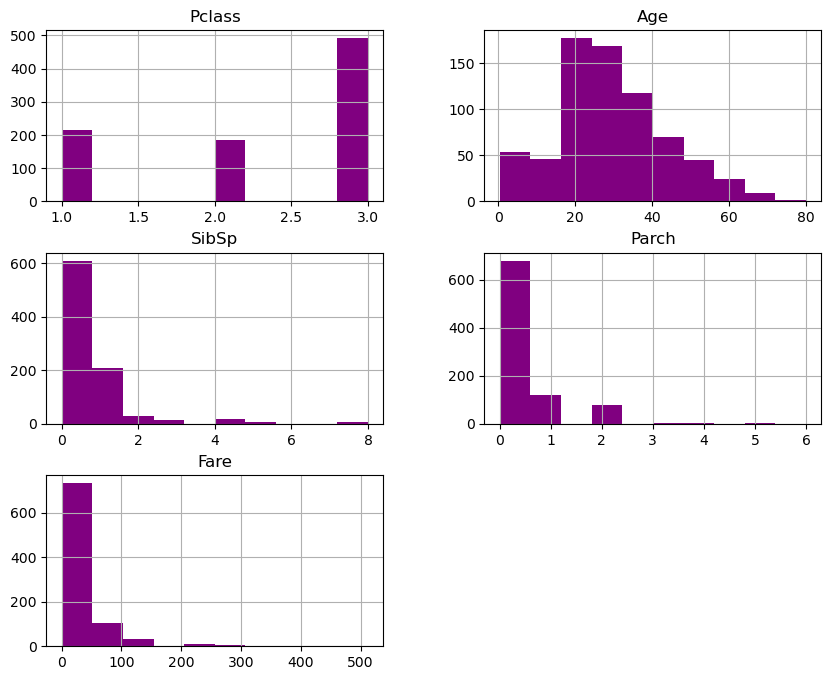

In [38]:
#checking distribution of predictors
X.hist(figsize=(10, 8), color="purple");

In [39]:
#splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### dummy model

In [43]:
#dummy model_train
no_survivors_train = pd.Series(0, index=range(len(y_train)))
#dumm model_test
no_survivors_test = pd.Series(0, index=range(len(y_test)))

In [47]:
#evaluation of dummy model with train data
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = no_survivors_train
                                 )

round(train_accuracy, 2)

test_accuracy = accuracy_score(y_true = y_test,
                                 y_pred = no_survivors_test
                                 )

round(train_accuracy, 2),round(test_accuracy, 2)

(0.62, 0.59)

### Decision tree

In [58]:
#selecting only numerical features
X_num = X.select_dtypes(include="number")
X_num = X_num.drop(columns=["Age"]) # dropping columns with NAs

In [59]:
#splitting again
X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.tree import DecisionTreeClassifier

# initializing the model
tree = DecisionTreeClassifier()

# fitting the model to the train data
tree.fit(X=X_num_train, y=y_train)

DecisionTreeClassifier()

In [61]:
# making predictions on train set
y_pred_tree_train = tree.predict(X_num_train)

# accury of the training set
accuracy_tree_train = accuracy_score(y_true = y_train,
                                     y_pred = y_pred_tree_train)

print(accuracy_tree_train)

0.8384831460674157


In [62]:
# making predictions on test set
y_pred_tree_test = tree.predict(X_num_test)

# accury of the training set
accuracy_tree_test = accuracy_score(y_true = y_test,
                                     y_pred = y_pred_tree_test)

print(accuracy_tree_test)

0.6927374301675978


### Evaluation with fpr, tpr, roc cur and auc

In [63]:
from sklearn import metrics

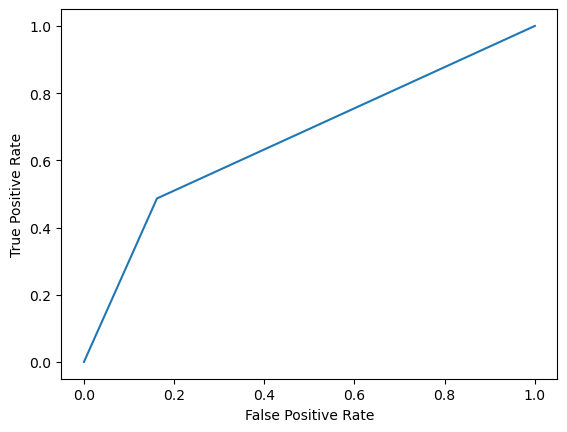

In [64]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_tree_test)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [67]:
auc = metrics.roc_auc_score(y_test,  y_pred_tree_test)
float(auc)

0.6622908622908623

### Error Analysis

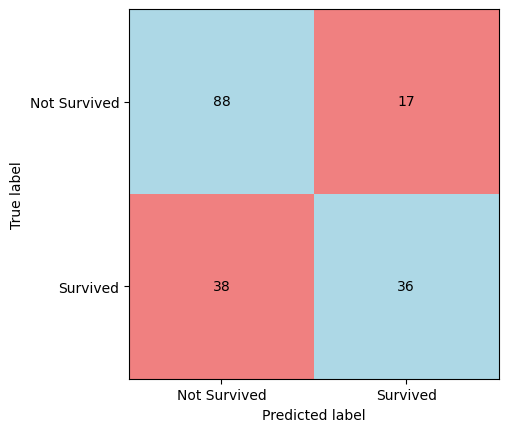

In [77]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_tree_test)

# Create a custom colormap: one color for TP+TN, another for FP+FN
colors = ['lightblue', 'lightcoral']
custom_cmap = plt.cm.colors.ListedColormap(colors)

# Define a matrix for coloring based on TP, TN, FP, FN
colored_cm = np.zeros_like(cm, dtype=int)
for i in range(len(cm)):
    for j in range(len(cm)):
        if i == j:  # TP or TN
            colored_cm[i, j] = 0
        else:  # FP or FN
            colored_cm[i, j] = 1

# Plot the confusion matrix with custom colors
fig, ax = plt.subplots()
im = ax.imshow(colored_cm, cmap=custom_cmap)

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'black'  # Text color for better contrast
        ax.text(j, i, cm[i, j], ha='center', va='center', color=color)

# Add axis labels and titles
ax.set_xticks(range(len(['Not Survived', 'Survived'])))
ax.set_yticks(range(len(['Not Survived', 'Survived'])))
ax.set_xticklabels(['Not Survived', 'Survived'])
ax.set_yticklabels(['Not Survived', 'Survived'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

plt.show()

## Make predictions

### Dataset split

In [22]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [78]:
X_num_train

,Pclass,SibSp,Parch,Fare
331,1,0,0,28.5000
733,2,0,0,13.0000
382,3,0,0,7.9250
704,3,1,0,7.8542
813,3,4,2,31.2750
...,...,...,...,...
106,3,0,0,7.6500
270,1,0,0,31.0000
860,3,2,0,14.1083
435,1,1,2,120.0000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
titanic_selected_with_nan = titanic_data.loc[:, ["Pclass", "Sex", "Age", "Survived"]]
titanic_selected = titanic_selected_with_nan.dropna()
titanic_selected.reset_index(drop=True, inplace=True)

In [ ]:
titanic_indep_var = titanic_selected.loc[:, ["Pclass", "Sex", "Age"]]
titanic_dep_var = titanic_selected.loc[:, ["Survived"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(titanic_indep_var, titanic_dep_var) # test_size=0.25 

### With GLMs - Comparisons

In [79]:
titanic_selected_train = pd.concat([X_num_train, y_train], axis=1)
titanic_selected_test = pd.concat([X_num_test, y_test], axis=1)

In [80]:
titanic_selected_train.columns

Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Survived'], dtype='object')

In [82]:
#modelling
formula = 'Survived ~ Pclass + SibSp + Parch + Fare'
model = smf.glm(formula, titanic_selected_train, family = sm.families.Binomial())
result = model.fit()
print(result.summary())
print("---")

print(result.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      707
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -428.46
Date:                Tue, 03 Dec 2024   Deviance:                       856.91
Time:                        15:50:19   Pearson chi2:                     713.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1140
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8231      0.337      2.444      0.0

### Error analysis

In [97]:
gml_predictions = result.predict(X_num_test)

In [99]:
gml_predictions_bool = (gml_predictions > 0.5).astype(int)

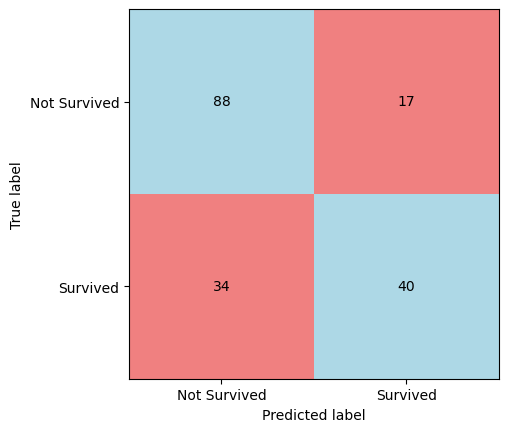

In [101]:
cm = confusion_matrix(y_test, gml_predictions_bool)

# Create a custom colormap: one color for TP+TN, another for FP+FN
colors = ['lightblue', 'lightcoral']
custom_cmap = plt.cm.colors.ListedColormap(colors)

# Define a matrix for coloring based on TP, TN, FP, FN
colored_cm = np.zeros_like(cm, dtype=int)
for i in range(len(cm)):
    for j in range(len(cm)):
        if i == j:  # TP or TN
            colored_cm[i, j] = 0
        else:  # FP or FN
            colored_cm[i, j] = 1

# Plot the confusion matrix with custom colors
fig, ax = plt.subplots()
im = ax.imshow(colored_cm, cmap=custom_cmap)

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'black'  # Text color for better contrast
        ax.text(j, i, cm[i, j], ha='center', va='center', color=color)

# Add axis labels and titles
ax.set_xticks(range(len(['Not Survived', 'Survived'])))
ax.set_yticks(range(len(['Not Survived', 'Survived'])))
ax.set_xticklabels(['Not Survived', 'Survived'])
ax.set_yticklabels(['Not Survived', 'Survived'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

plt.show()

In [103]:
auc = metrics.roc_auc_score(y_test,  y_pred_tree_test)
float(auc)

0.6622908622908623

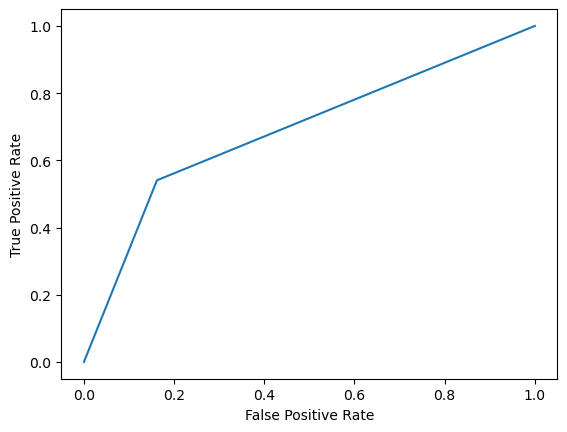

In [102]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, gml_predictions_bool)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()